In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')
import plotter

## Importing data points
Generated by data_gen_determ_speed

In [41]:
f = open('data/rescaling_speed_pars.tsv', 'r')

Ds, betas, gammas = [], [], []
for line in f.readlines():
    if line[0] == '#':
        continue
        
    par = line.split('\t')[0]
    val = float(line.split('\t')[1])
    if par == 'D':
        Ds.append(val)
    if par == 'beta':
        betas.append(val)
    if par == 'gamma':
        gammas.append(val)
        
f.close()


f = open('data/rescaling_speed.tsv', 'r')
r0_list_resc = []
speeds_resc, speeds_FKPP_resc, speeds_lin_resc = [], [], []
run = 0
speeds_aux, speeds_FKPP_resc_aux, speeds_lin_resc_aux = [], [], []
for line in f.readlines():
    if line[0] == '#':
        continue
        
    current_run = int(line.split('\t')[0])
    if current_run > run:
        run = current_run
        speeds_resc.append(speeds_aux)
        speeds_FKPP_resc.append(speeds_FKPP_resc_aux)
        speeds_lin_resc.append(speeds_lin_resc_aux)
        speeds_aux, speeds_FKPP_resc_aux, speeds_lin_resc_aux = [], [], []
        
    speeds_aux.append(float(line.split('\t')[2]))
    speeds_FKPP_resc_aux.append(float(line.split('\t')[5]))
    speeds_lin_resc_aux.append(float(line.split('\t')[6]))
    if run == 0:
        r0_list_resc.append(float(line.split('\t')[1]))
    
r0_list_resc = np.array(r0_list_resc)
speeds_resc = np.row_stack((speeds_resc, speeds_aux))
speeds_FKPP_resc =np.row_stack((speeds_FKPP_resc, speeds_FKPP_resc_aux))
speeds_lin_resc =np.row_stack((speeds_lin_resc, speeds_lin_resc_aux))

f.close()

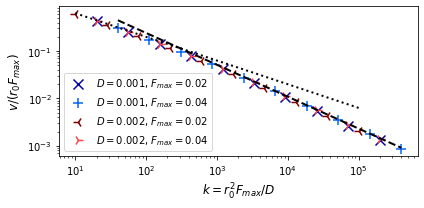

In [44]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,3))
colors = ['#0504aa', '#0165fc', '#840000', '#ff474c']
markers = ['x', '+', '3', '4']

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlabel(r'$k = r_0^2 F_{max}/D$', fontsize=12)
ax1.set_ylabel(r'$v/(r_0 F_{max})$', fontsize=12)

for i in range(len(Ds)):
    D, b, g = Ds[i], betas[i], gammas[i]
    ax1.scatter(r0_list_resc**2*(b-g)/D, speeds_resc[i]/r0_list_resc/(b-g), s=100,
                    label=r"$D=%g$, $F_{max}=$%g"%(D,b-g), marker=markers[i], color=colors[i])

        
        
ax1.legend()

run = 2
ax1.plot(r0_list_resc**2*(betas[run]-g)/Ds[run], 
         speeds_FKPP_resc[run]/r0_list_resc/(betas[run]-g), c='k', ls=':', lw=2)
run = 1
ax1.plot(r0_list_resc**2*(betas[run]-g)/Ds[run], speeds_lin_resc[run]/r0_list_resc/(betas[run]-g), c='k', ls='--', lw=2)
plt.tight_layout()

plt.savefig('plots/speed_rescaling.svg')

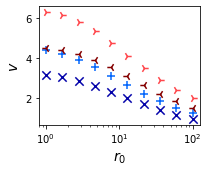

In [46]:
fig, ax1 = plt.subplots(1, 1, figsize=(3,2.5))

ax1.set_xscale('log')
ax1.set_xlabel(r'$r_0$', fontsize=14)
ax1.set_ylabel(r'$v$', fontsize=14)
for i in range(len(Ds)):
    D, b = Ds[i], betas[i]
    ax1.scatter(r0_list_resc, speeds_resc[i]*365, marker=markers[i], color=colors[i], s=70)

plt.tight_layout()

plt.savefig('plots/speed_no_rescaling.svg')